# Neurocloud: Regression

In [89]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# Loading Data

# Satisfaction Data
# https://stats.oecd.org/index.aspx?DataSetCode=BLI#
# Load data, extract interesting values, save reduced one
dat = pd.read_csv('/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/satisfaction.csv')
sat = dat.loc[dat.Indicator == "Life satisfaction", :]
sat = sat.loc[sat.INEQUALITY == 'TOT', : ]
sat = sat.loc[sat.INDICATOR == 'SW_LIFS', : ]
sat = sat.loc[sat.Unit == 'Average score', : ]
sat = sat.loc[:, ['LOCATION', 'Country', 'Value']]
sat = sat.rename(columns={"Value": "Satisfaction"})

# GDP Data
# https://data.oecd.org/gdp/gross-domestic-product-gdp.htm
dat = pd.read_csv('/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/GDP.csv')
gdp2 = dat.loc[dat.TIME == 2020, :]
gdp3 = gdp2.loc[gdp2.MEASURE == 'USD_CAP', :]
gdp = gdp3.loc[:, ['LOCATION','Value']]
gdp = gdp.rename(columns={"Value": "GDP"})

In [81]:
sat.head()

,LOCATION,Country,Satisfaction
35,AUS,Australia,7.1
36,AUT,Austria,7.2
37,BEL,Belgium,6.8
38,CAN,Canada,7.0
39,CZE,Czech Republic,6.9


In [82]:
gdp.head()

,LOCATION,GDP
122,AUS,55690.918600
226,AUT,57253.300563
330,BEL,54539.032525
443,CAN,47228.372488
507,CZE,42813.741340


# Merging the two DFs

In [84]:
merged_data = pd.merge(sat,gdp)

# Saving the data 

In [85]:
#merged_data.to_csv(path_or_buf='/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/sat_gdp.csv', sep=',') # Save data

# Read the final data 

In [91]:
final_dat = pd.read_csv('/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/sat_gdp.csv', index_col= 0)

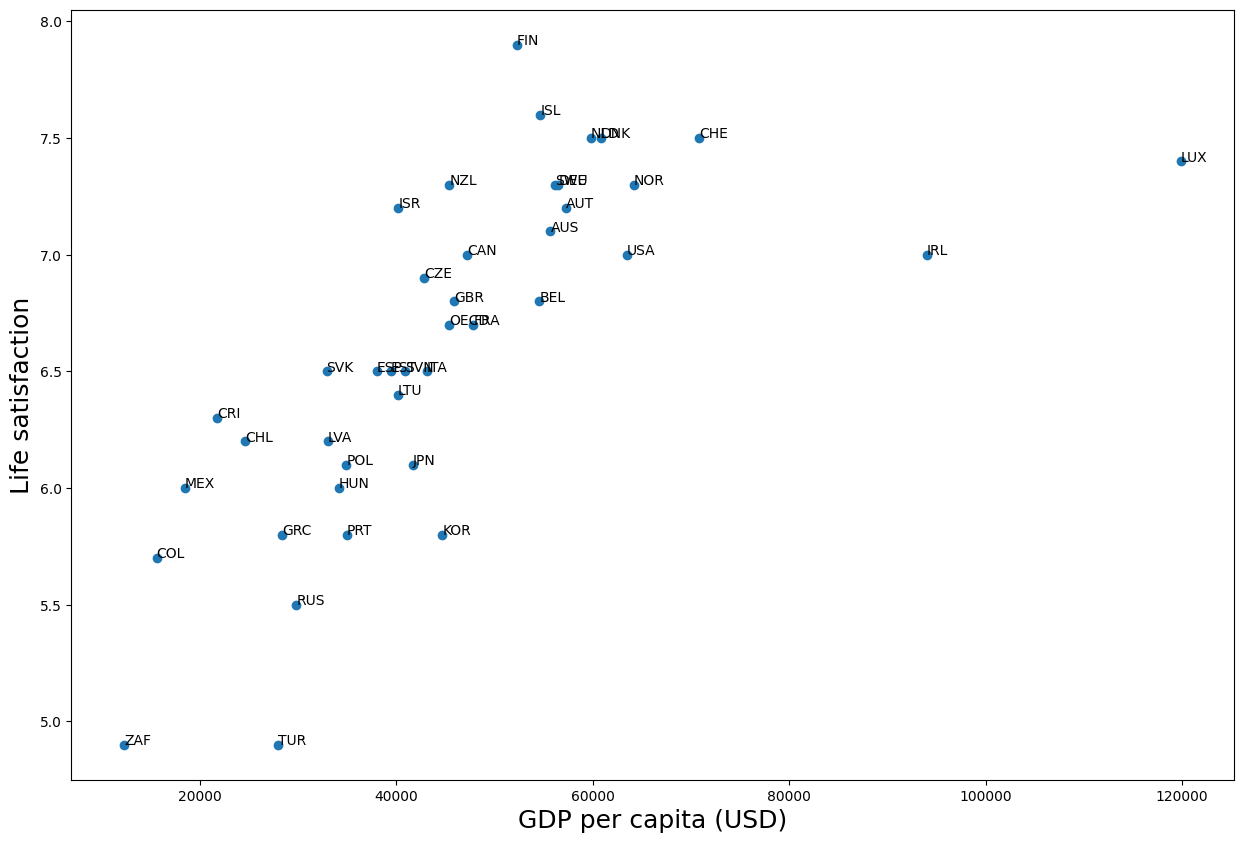

In [110]:
# Visualize the data
X = np.array(final_dat.GDP)
y = np.array(final_dat.Satisfaction)

fig, ax = plt.subplots(1, figsize=(15,10))
ax.scatter(X,y)

for i, txt in enumerate(final_dat.LOCATION):
    ax.annotate(txt, (X[i], y[i]))

ax.set_xlabel('GDP per capita (USD)', fontsize=18)
ax.set_ylabel('Life satisfaction', fontsize=18)
plt.show()

In [105]:
ax.set_xlabel?

Signature: ax.set_xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
Docstring:
Set the label for the x-axis.

Parameters
----------
xlabel : str
    The label text.

labelpad : float, default: :rc:`axes.labelpad`
    Spacing in points from the Axes bounding box including ticks
    and tick labels.  If None, the previous value is left as is.

loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
    The label position. This is a high-level alternative for passing
    parameters *x* and *horizontalalignment*.

Other Parameters
----------------
**kwargs : `.Text` properties
    `.Text` properties control the appearance of the label.

See Also
--------
text : Documents the properties supported by `.Text`.
File:      /opt/anaconda3/envs/neurocloud/lib/python3.7/site-packages/matplotlib/axes/_base.py
Type:      method
